<a href="https://colab.research.google.com/github/midhulms/ML/blob/master/rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
import itertools
import numpy as np
import io
import pandas as pd
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

use arima model wheat prediction

In [0]:

link="https://raw.githubusercontent.com/midhulms/ML/master/ricepred.csv"

df= pd.read_csv(link, skipinitialspace=True, usecols=fields)

In [54]:
df.head()

,Modal_Price,Price_Date
0,96.9,30 Apr 04
1,97.8,30 May 04
2,98.7,30 Jun 04
3,98.9,30 Jul 04
4,99.7,30 Aug 04


In [0]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [0]:
df=df.set_index('Price_Date')

In [58]:

df.head(2)

,Modal_Price
Price_Date,
2004-04-30,96.9
2004-05-30,97.8


In [0]:
data = df.copy()
y = data

In [60]:
y

,Modal_Price
Price_Date,
2004-04-30,96.9
2004-05-30,97.8
2004-06-30,98.7
2004-07-30,98.9
2004-08-30,99.7
2004-09-30,100.3
2004-10-30,101.1
2004-11-30,100.7
2004-12-30,100.8


In [61]:
y = y['Modal_Price'].resample('MS').mean()
y = y.fillna(y.bfill())
print(y)

Price_Date
2004-04-01     96.9
2004-05-01     97.8
2004-06-01     98.7
2004-07-01     98.9
2004-08-01     99.7
2004-09-01    100.3
2004-10-01    101.1
2004-11-01    100.7
2004-12-01    100.8
2005-01-01    101.2
2005-02-01    102.1
2005-03-01    102.1
2005-04-01    102.5
2005-05-01    102.5
2005-06-01    104.3
2005-07-01    105.7
2005-08-01    106.7
2005-09-01    107.0
2005-10-01    107.6
2005-11-01    106.6
2005-12-01    105.0
2006-01-01    104.9
2006-02-01    105.0
2006-03-01    105.0
2006-04-01    105.6
2006-05-01    106.4
2006-06-01    107.0
2006-07-01    107.3
2006-08-01    107.8
2006-09-01    108.9
              ...  
2014-10-01    247.0
2014-11-01    245.4
2014-12-01    240.3
2015-01-01    239.2
2015-02-01    233.6
2015-03-01    233.6
2015-04-01    234.0
2015-05-01    234.4
2015-06-01    237.2
2015-07-01    237.7
2015-08-01    237.2
2015-09-01    238.0
2015-10-01    238.6
2015-11-01    237.4
2015-12-01    237.3
2016-01-01    238.9
2016-02-01    238.7
2016-03-01    238.7
2016-04-0

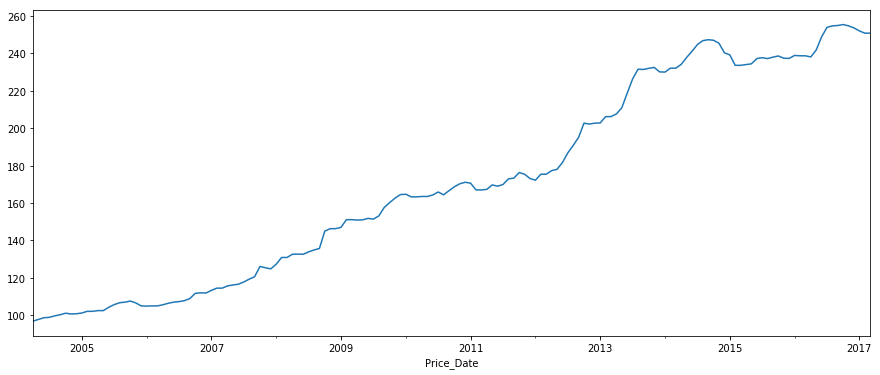

In [62]:
y.plot(figsize=(15, 6))
plt.show()

In [64]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [65]:
warnings.filterwarnings("ignore") 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2050.9165093351435
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1747.9522547213828
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1202.4546475033626
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1033.4232148178548
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1091.3990667417515
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1053.7750664543025
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1043.3432910436777
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1024.3047764252292
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1833.6419909739845
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1547.1421717241535
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1021.8084330874873
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:875.5374545380214
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:933.1276738595487
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:928.3771772917034
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:899.4212701370598
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:873.0059872234615
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:701.7096603302632
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:626.4977589494315

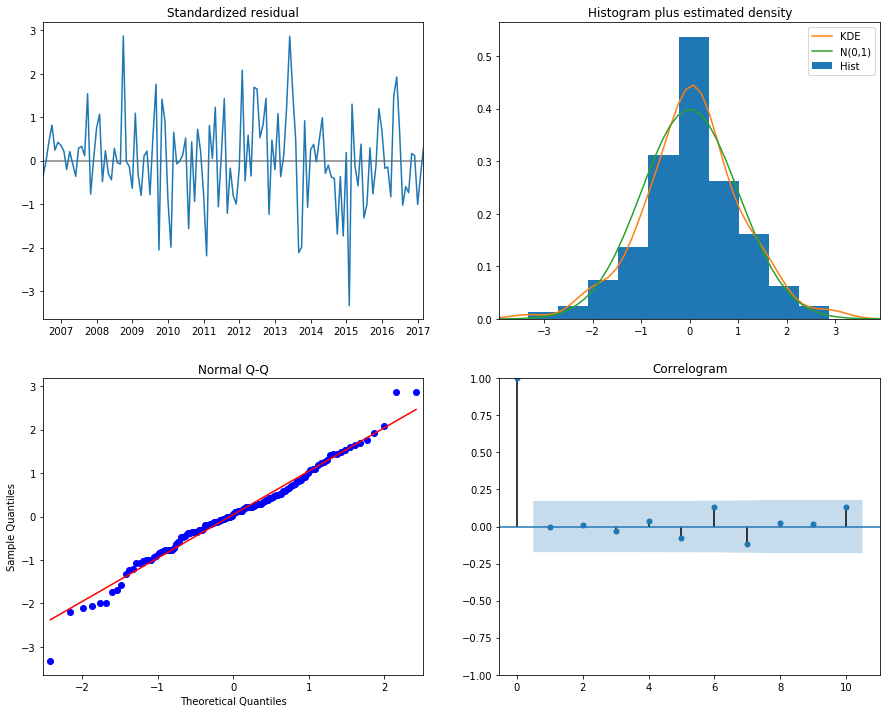

In [66]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

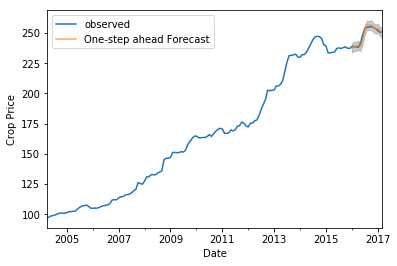

In [68]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()
plt.show()

In [69]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.66


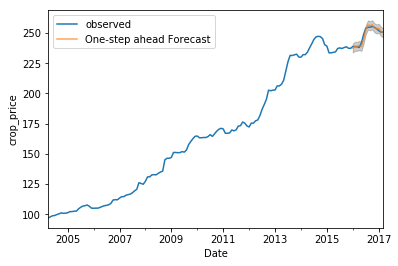

In [70]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [71]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.66


In [0]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

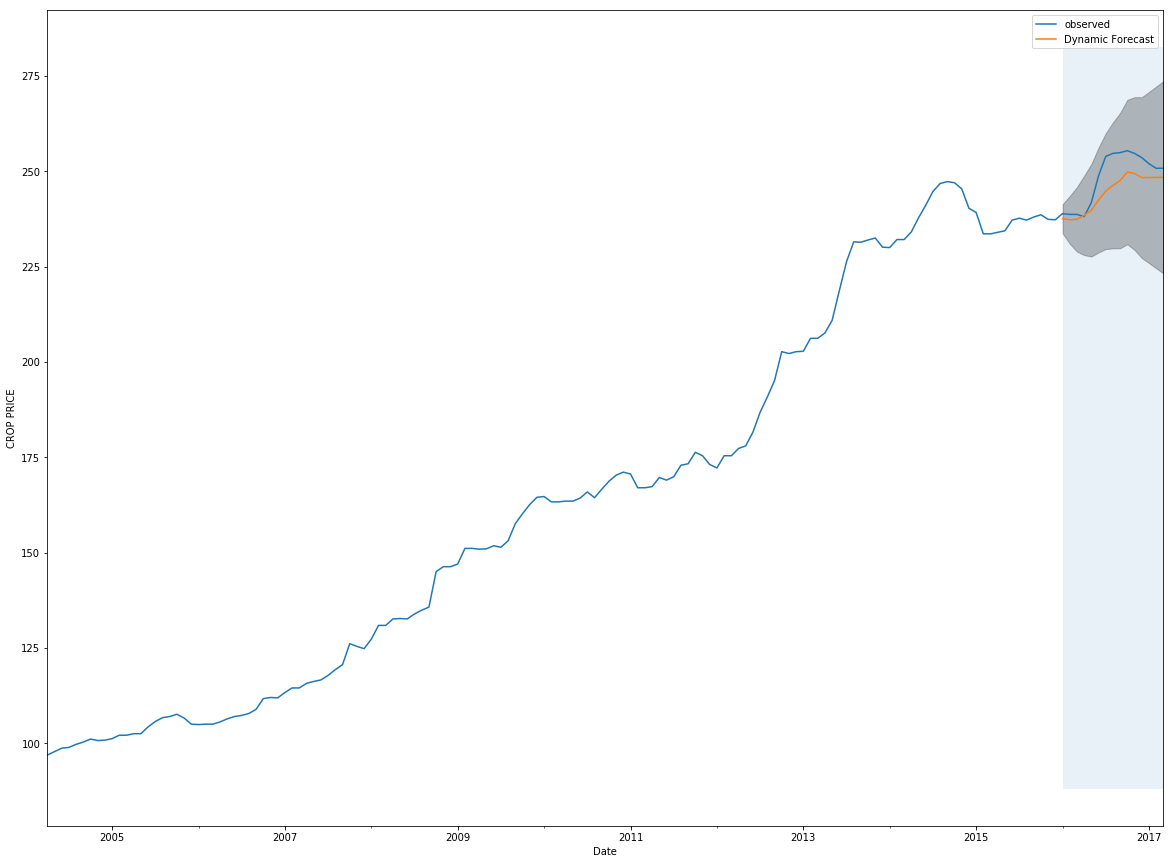

In [73]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')
plt.legend()
plt.show()

In [74]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-01-30':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5.67


In [0]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

In [76]:
pred_ci

,lower Modal_Price,upper Modal_Price
2017-04-01,247.421387,254.975776
2017-05-01,246.968541,259.474503
2017-06-01,248.632801,265.511252
2017-07-01,249.973029,270.746572
2017-08-01,249.708275,273.978146
2017-09-01,249.115361,276.552888
2017-10-01,249.555853,279.891221
2017-11-01,247.817063,280.827979
2017-12-01,245.391797,280.893644
2018-01-01,243.930160,281.768005


In [0]:
pred_ci.to_csv(r"predicted_RICE_price.csv")

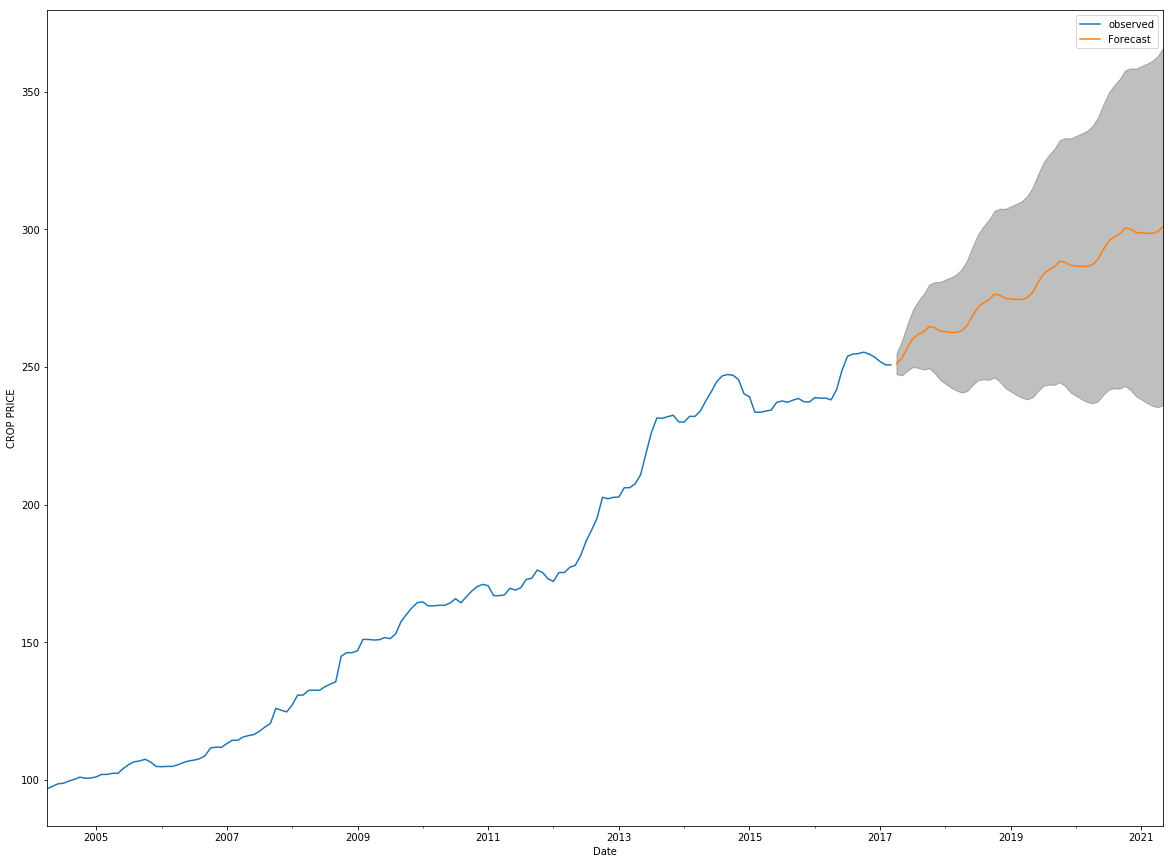

In [78]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')
plt.legend()
plt.show()